In [1]:
import torch
import torch.nn as nn
import os
import sys
import numpy as np
import argparse
import yaml
from matplotlib import pyplot as plt
sys.path.append('../dsc/')
sys.path.append("../..")
sys.path.append("../../tslib/src/")
sys.path.append("../../tslib/")
sys.path.append(os.getcwd())
from dsc_model import DSCModel
from bert2bert import Bert2BertSynCtrl
from transformers import BertConfig
from src import tsUtils
import pandas as pd
from src.synthcontrol.syntheticControl import RobustSyntheticControl
from src.synthcontrol.multisyntheticControl import MultiRobustSyntheticControl
%load_ext autoreload
%autoreload 2

In [3]:
# Fitting Basque
datapath = f'../datasets/basque_unscaled/'
config_path = '../exp_configs/basque/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/basque_unscaled/'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 15
interv_time = 15
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.fit(interv_time)

Low rank conversion done
Pretraining model on donor units
Iteration:0	Loss_mean:1.1041944026947021	Loss_std:0.0
Iteration:100	Loss_mean:0.31042561716400086	Loss_std:0.4966445718287688
Iteration:200	Loss_mean:0.3910937329567969	Loss_std:0.4301368281922426
Iteration:300	Loss_mean:0.2844486671499908	Loss_std:0.25628071713954637
Iteration:400	Loss_mean:0.27432641574181615	Loss_std:0.34637249945292403
Iteration:500	Loss_mean:0.25447748265694825	Loss_std:0.2777341613571582
Iteration:600	Loss_mean:0.17369703847914933	Loss_std:0.15496050467456943
Iteration:700	Loss_mean:0.15797698739916086	Loss_std:0.16672160789807677
Iteration:800	Loss_mean:0.10199186415760778	Loss_std:0.1062235672172989
Iteration:900	Loss_mean:0.09617862559854984	Loss_std:0.09924443884881477
Iteration:1000	Loss_mean:0.06507780145737342	Loss_std:0.07254664080872444
Iteration:1100	Loss_mean:0.06119596115793684	Loss_std:0.08369842606023677
Iteration:1200	Loss_mean:0.06844871942594181	Loss_std:0.10682378725879765
Iteration:1300	

KeyboardInterrupt: 

In [5]:
# Finetuning Basque
datapath = f'../datasets/basque_unscaled/'
config_path = '../exp_configs/basque/config.yaml'
model_path = f'../logs_dir/basque_unscaled/pretrain/model.pth'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/basque_unscaled/'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 16
interv_time = 15
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.load_model_from_checkpoint(model_path)
dscmodel.fit(interv_time,pretrain=False)

Modifying K
Low rank conversion done
Fitting model on target unit
Iteration:0	Loss_mean:0.028271509334445	Loss_std:0.0
Iteration:100	Loss_mean:0.003732107549876673	Loss_std:0.005786959010556012
Iteration:200	Loss_mean:0.0008458754812545521	Loss_std:0.0011665111280791363
Iteration:300	Loss_mean:0.0005387821394469938	Loss_std:0.0005023156332834764
Iteration:400	Loss_mean:0.00035763076239163637	Loss_std:0.00030480129884247203
Iteration:500	Loss_mean:0.00027256711855443426	Loss_std:0.00023370973473279798
Iteration:600	Loss_mean:0.0002675004839875328	Loss_std:0.00020172664394878674
Iteration:700	Loss_mean:0.00023115405869248207	Loss_std:0.0001873120405065367
Iteration:800	Loss_mean:0.00021327439448214135	Loss_std:0.00017975833752383445
Iteration:900	Loss_mean:0.00019595591259076174	Loss_std:0.0001522149836279835


In [6]:
#RSC, mRSC predict
data_dir = f'../datasets/basque_unscaled/'
mask = np.load(data_dir+'mask.npy',allow_pickle=True)
data = np.load(data_dir+'data.npy',allow_pickle=True)
data[np.nonzero(mask)] = 0
prob_missing = np.sum(mask)/(data.shape[0]*data.shape[1]*data.shape[2])
TrainingEnd= 15

all_observations=[]
for i in range(data.shape[2]):
    all_observations.append(data[:,:,i])

N = all_observations[0].shape[0] -1
T = all_observations[0].shape[1]
print(N,T)
trainingDict_alls = [{} for i in range(data.shape[2])]
testDict_alls = [{} for i in range(data.shape[2])]



for i in range(0, N+1):
    for j in range(data.shape[2]):
        trainingDict_alls[j].update({str(i): all_observations[j][i, 0:TrainingEnd]})
        testDict_alls[j].update({str(i): all_observations[j][i, TrainingEnd:]})

keySeriesLabel = '15'
otherSeriesLabels = []
for ind in range(N+1):
    if str(ind)!=keySeriesLabel:
        otherSeriesLabels.append(str(ind))

# RSC analysis
singvals = 1
train_DF_alls = []
test_DF_alls = []
for j in range(data.shape[2]):
    train_DF_alls.append(pd.DataFrame(data=trainingDict_alls[j]))
    test_DF_alls.append(pd.DataFrame(data=testDict_alls[j]))


rscmodel = RobustSyntheticControl(keySeriesLabel, singvals, len(train_DF_alls[0]), probObservation=1.0, svdMethod='numpy', otherSeriesKeysArray=otherSeriesLabels)
rscmodel.fit(train_DF_alls[0])
predictionsRSC = rscmodel.predict(test_DF_alls[0])

####  multi RSC model (combined) --
relative_weights = [1.0 for i in range(data.shape[2])]

# instantiate the model
mrscmodel = MultiRobustSyntheticControl(data.shape[2], relative_weights, keySeriesLabel, singvals, len(train_DF_alls[0]), probObservation=1-prob_missing, svdMethod='numpy', otherSeriesKeysArray=otherSeriesLabels)

# fit
mrscmodel.fit([train_DF_alls[i] for i in range(data.shape[2])])

# predict
combinedPredictionsArray = mrscmodel.predict([test_DF_alls[i] for i in range(data.shape[2])])

# split the predictions for the metrics
predictionsmRSC = combinedPredictionsArray[0]
op_dir = f'../logs_dir/basque/'
np.save(op_dir+'mrsc_pred.npy',predictionsmRSC)
np.save(op_dir+'rsc_pred.npy',predictionsRSC)
mrsc_pred = predictionsmRSC
rsc_pred = predictionsRSC
denoisedDF = rscmodel.model.denoisedDF()
rsc_pred_pre = denoisedDF[keySeriesLabel]
denoisedDF = mrscmodel.model.denoisedDF()
mrsc_pred_pre = denoisedDF[keySeriesLabel]

16 43


In [15]:
#Predict DSC

interv_time = 15
datapath = f'../datasets/basque_unscaled/'
config_path = '../exp_configs/basque/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/basque_unscaled/'
model_path = f'../logs_dir/basque_unscaled/finetune/model.pth'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 16
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.load_model_from_checkpoint(model_path)
op= dscmodel.predict(1)

Modifying K
Low rank conversion done


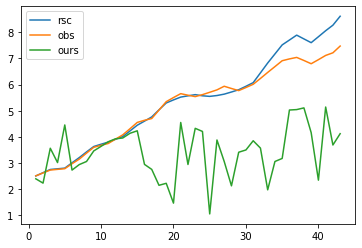

In [16]:
#Plot all
plt.figure()
xrange = np.arange(T)+1
rsc_all = np.append(rsc_pred_pre,rsc_pred,axis=0)
mrsc_all = np.append(mrsc_pred_pre[:15],rsc_pred,axis=0)
obs_all = np.append(trainingDict_alls[0][keySeriesLabel],testDict_alls[0][keySeriesLabel],axis=0)
obs_cataluna = np.append(trainingDict_alls[0]['9'],testDict_alls[0]['9'],axis=0)
obs_argon = np.append(trainingDict_alls[0]['2'],testDict_alls[0]['2'],axis=0)
plt.plot(xrange,rsc_all,label='rsc')
#plt.plot(xrange,mrsc_all,label='mrsc')
plt.plot(xrange,obs_all,label='obs')
plt.plot(xrange,op,label='ours')
#plt.plot(xrange,obs_cataluna,label='Cataluna')
#plt.plot(xrange,obs_argon,label='Argon')
plt.legend()

In [18]:
# Fitting Cataluna
datapath = f'../datasets/basque_unscaled/'
config_path = '../exp_configs/basque/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/cataluna/'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 8
interv_time = 15
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.fit(interv_time)

Low rank conversion done
Pretraining model on donor units
Iteration:0	Loss_mean:0.06915699690580368	Loss_std:0.0
Iteration:100	Loss_mean:0.2526448439760134	Loss_std:0.28310264891628373
Iteration:200	Loss_mean:0.33402308912482115	Loss_std:0.37666608213498776
Iteration:300	Loss_mean:0.25902612729929386	Loss_std:0.2729639038859053
Iteration:400	Loss_mean:0.21011551013216376	Loss_std:0.25977797873014047
Iteration:500	Loss_mean:0.1806238414091058	Loss_std:0.21191215935817076
Iteration:600	Loss_mean:0.16087905188003787	Loss_std:0.18489723114252057
Iteration:700	Loss_mean:0.13590615176828577	Loss_std:0.14204345138747315
Iteration:800	Loss_mean:0.12301702576805837	Loss_std:0.12141189529673893
Iteration:900	Loss_mean:0.09618353569618193	Loss_std:0.10019015368248499
Iteration:1000	Loss_mean:0.07823593304987299	Loss_std:0.09253404044021406
Iteration:1100	Loss_mean:0.06734362713934389	Loss_std:0.09336249874520428
Iteration:1200	Loss_mean:0.0692264343466377	Loss_std:0.0835873152686912
Iteration:130

In [4]:
#RSC, mRSC predict
data_dir = f'../datasets/basque_unscaled/'
mask = np.load(data_dir+'mask.npy',allow_pickle=True)
data = np.load(data_dir+'data.npy',allow_pickle=True)
data[np.nonzero(mask)] = 0
prob_missing = np.sum(mask)/(data.shape[0]*data.shape[1]*data.shape[2])
TrainingEnd= 15

all_observations=[]
for i in range(data.shape[2]):
    all_observations.append(data[:,:,i])

N = all_observations[0].shape[0] -1
T = all_observations[0].shape[1]
trainingDict_alls = [{} for i in range(data.shape[2])]
testDict_alls = [{} for i in range(data.shape[2])]



for i in range(0, N+1):
    for j in range(data.shape[2]):
        trainingDict_alls[j].update({str(i): all_observations[j][i, 0:TrainingEnd]})
        testDict_alls[j].update({str(i): all_observations[j][i, TrainingEnd:]})

keySeriesLabel = '8'
otherSeriesLabels = []
for ind in range(N+1):
    if str(ind)!=keySeriesLabel:
        otherSeriesLabels.append(str(ind))

# RSC analysis
singvals = 1
train_DF_alls = []
test_DF_alls = []
for j in range(data.shape[2]):
    train_DF_alls.append(pd.DataFrame(data=trainingDict_alls[j]))
    test_DF_alls.append(pd.DataFrame(data=testDict_alls[j]))


rscmodel = RobustSyntheticControl(keySeriesLabel, singvals, len(train_DF_alls[0]), probObservation=1.0, svdMethod='numpy', otherSeriesKeysArray=otherSeriesLabels)
rscmodel.fit(train_DF_alls[0])
predictionsRSC = rscmodel.predict(test_DF_alls[0])

####  multi RSC model (combined) --
relative_weights = [1.0 for i in range(data.shape[2])]

# instantiate the model
mrscmodel = MultiRobustSyntheticControl(data.shape[2], relative_weights, keySeriesLabel, singvals, len(train_DF_alls[0]), probObservation=1-prob_missing, svdMethod='numpy', otherSeriesKeysArray=otherSeriesLabels)

# fit
mrscmodel.fit([train_DF_alls[i] for i in range(data.shape[2])])

# predict
combinedPredictionsArray = mrscmodel.predict([test_DF_alls[i] for i in range(data.shape[2])])

# split the predictions for the metrics
predictionsmRSC = combinedPredictionsArray[0]
mrsc_pred = predictionsmRSC
rsc_pred = predictionsRSC
denoisedDF = rscmodel.model.denoisedDF()
rsc_pred_pre = denoisedDF[keySeriesLabel]
denoisedDF = mrscmodel.model.denoisedDF()
mrsc_pred_pre = denoisedDF[keySeriesLabel]

In [2]:
#Predict DSC

interv_time = 15
datapath = f'../datasets/basque_unscaled/'
config_path = '../exp_configs/basque/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/cataluna/'
model_path = f'../logs_dir/cataluna/finetune/model.pth'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 8
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.load_model_from_checkpoint(model_path)
op= dscmodel.predict(15)

Modifying K
Low rank conversion done


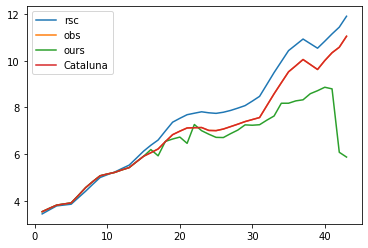

In [5]:
#Plot all
plt.figure()
xrange = np.arange(T)+1
rsc_all = np.append(rsc_pred_pre,rsc_pred,axis=0)
mrsc_all = np.append(mrsc_pred_pre[:15],rsc_pred,axis=0)
obs_all = np.append(trainingDict_alls[0][keySeriesLabel],testDict_alls[0][keySeriesLabel],axis=0)
obs_cataluna = np.append(trainingDict_alls[0]['8'],testDict_alls[0]['8'],axis=0)
plt.plot(xrange,rsc_all,label='rsc')
#plt.plot(xrange,mrsc_all,label='mrsc')
plt.plot(xrange,obs_all,label='obs')
plt.plot(xrange,op,label='ours')
plt.plot(xrange,obs_cataluna,label='Cataluna')
#plt.plot(xrange,obs_argon,label='Argon')
plt.legend()

In [ ]:
# Fitting Aragon
datapath = f'../datasets/basque/'
config_path = '../exp_configs/basque/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/cataluna/'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 2
interv_time = 15
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.fit(interv_time)

In [ ]:
# Fitting Castilla-Y
datapath = f'../datasets/basque/'
config_path = '../exp_configs/basque/config.yaml'
config = yaml.load(open(config_path,'r'),Loader=yaml.FullLoader)
op_path = f'../logs_dir/cataluna/'
if not(os.path.exists(op_path)):
    os.mkdir(op_path)
random_seed = 0
target_index = 7
interv_time = 15
lowrank = True
device = torch.device('cuda:0' if torch.cuda.is_available else "cpu")
classes = None
config_model = BertConfig(hidden_size = config['hidden_size'],
                        num_hidden_layers = config['n_layers'],
                        num_attention_heads = config['n_heads'],
                        intermediate_size = 4*config['hidden_size'],
                        vocab_size = 0,
                        max_position_embeddings = 0,
                        output_hidden_states = True,
                        )

config_model.add_syn_ctrl_config(K=config['K'],
                                pre_int_len=config['pre_int_len'],
                                post_int_len=config['post_int_len'],
                                feature_dim=config['feature_dim'],
                                time_range=config['time_range'],
                                seq_range=config['seq_range'],
                                cont_dim=config['cont_dim'],
                                discrete_dim=config['discrete_dim'],
                                classes = classes)
model = Bert2BertSynCtrl(config_model, random_seed)
model = model.to(device)
dscmodel = DSCModel(model,
                    config,
                    op_path,
                    target_index,
                    random_seed,
                    datapath,
                    device,
                    lowrank = True,
                    classes=None)
dscmodel.fit(interv_time)